In [3]:
library (tidyverse)

In [4]:
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

glimpse(players)
glimpse(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

The datasets have been loaded scucessfully. 'players.csv' contains individual player data and characteristics, 'sessions.csv' contains records of each play sesion including start and end times. We will focus primarily on 'sessions.csv' to analyze peak time windows. 

In [8]:
sessions_hour <- sessions |>
    mutate(hour = as.numeric(substring(start_time, 12, 13)))

hour,num_sessions
<dbl>,<int>
0,128
1,79
2,152
3,131
4,151
5,88
6,74
7,56
8,12


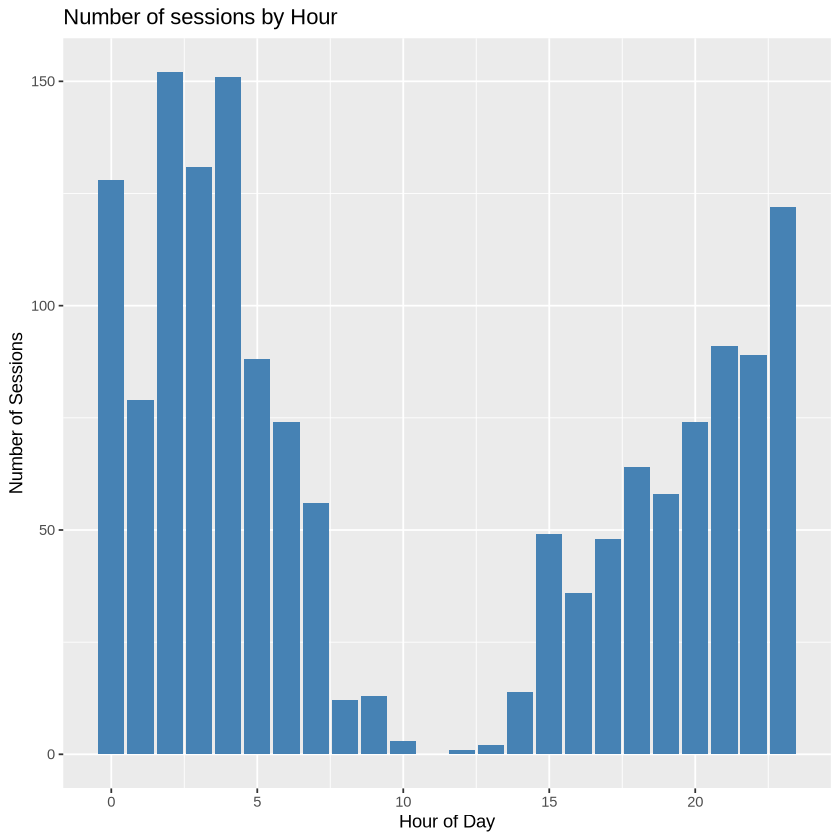

In [9]:
hourly_activity <- sessions_hour |>
    group_by(hour) |>
    summarize(num_sessions = n(), .groups = "drop")
hourly_activity

ggplot(sessions_hour, aes(x = hour)) +
    geom_bar(fill = "steelblue") + 
    labs(title = "Number of sessions by Hour", x = "Hour of Day", y = "Number of Sessions")


- Peak activity occurs between 21:00 -> 04:00
- Middle of the day has significantly fewer sessions
- Variance in sessions counts differ by the hour

- Method: Linear regression on session counts per hour
- Assumptions: Independence across hours
- Limitations: Hour-specifi 